In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
#create a dataframe
df = pd.read_csv('/content/drive/MyDrive/Certificates For Master Resume IITM Placement/ai4i2020.csv')

In [51]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [52]:
df.columns.to_list()

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [53]:
num = list(df.columns[3:8])
cat = [df.columns[2]]
label_binary = [df.columns[8]]
label_multi = list(df.columns[9:])

In [54]:
print(f'num: {num}')
print(f'cat: {cat}')
print(f'label_binary: {label_binary}')
print(f'label_multi: {label_multi}')

num: ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
cat: ['Type']
label_binary: ['Machine failure']
label_multi: ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [56]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

## Checking Duplicate data

In [57]:
df[df.duplicated(keep=False)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF


In [58]:
df.duplicated().sum()

0

**There is no duplicated data.**

In [59]:
df_failures = df.loc[df[label_binary[0]] == 1]
df_failures[(df_failures[label_multi] == 0).all(axis=1)][label_binary + label_multi]

,Machine failure,TWF,HDF,PWF,OSF,RNF
1437,1,0,0,0,0,0
2749,1,0,0,0,0,0
4044,1,0,0,0,0,0
4684,1,0,0,0,0,0
5536,1,0,0,0,0,0
5941,1,0,0,0,0,0
6478,1,0,0,0,0,0
8506,1,0,0,0,0,0
9015,1,0,0,0,0,0


In [60]:
df.drop(df_failures[(df_failures[label_multi] == 0).all(axis=1)][label_binary + label_multi].index, inplace = True)

In [61]:
df_nonfailures = df.loc[df[label_binary[0]] == 0]
df_nonfailures[(df_nonfailures[label_multi] != 0).any(axis=1)][label_binary + label_multi]

,Machine failure,TWF,HDF,PWF,OSF,RNF
1221,0,0,0,0,0,1
1302,0,0,0,0,0,1
1748,0,0,0,0,0,1
2072,0,0,0,0,0,1
2559,0,0,0,0,0,1
3065,0,0,0,0,0,1
3452,0,0,0,0,0,1
5471,0,0,0,0,0,1
5489,0,0,0,0,0,1
5495,0,0,0,0,0,1


In [62]:
nonfailures_index = df_nonfailures[(df_nonfailures[label_multi] != 0).any(axis=1)][label_binary].index
df.loc[nonfailures_index, label_binary] = df.loc[nonfailures_index, label_binary].replace(0, 1, inplace = False)

In [63]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [64]:
df.reset_index(drop = True, inplace = True)

In [65]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [66]:
df[df['Machine failure']==1][label_multi].value_counts()

TWF  HDF  PWF  OSF  RNF
0    1    0    0    0      106
     0    1    0    0       80
          0    1    0       78
1    0    0    0    0       42
0    0    0    0    1       18
          1    1    0       11
     1    0    1    0        6
          1    0    0        3
1    0    0    1    0        2
               0    1        1
          1    1    0        1
dtype: int64

In [67]:
#test
for i in (('L', 0), ('M', 1), ('H', 2)):
  df.Type =  df.Type.replace(*i)

In [68]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [70]:
#create a scaler object
scaler = StandardScaler()

#perform scaling on the numeric column
df[num] = scaler.fit_transform(df[num])

In [71]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,1,-0.952222,-0.947078,0.068015,0.282351,-1.695786,0,0,0,0,0,0
1,2,L47181,0,-0.902227,-0.879689,-0.729478,0.633456,-1.648656,0,0,0,0,0,0
2,3,L47182,0,-0.952222,-1.014468,-0.227559,0.944434,-1.617236,0,0,0,0,0,0
3,4,L47183,0,-0.902227,-0.947078,-0.590056,-0.048691,-1.585816,0,0,0,0,0,0
4,5,L47184,0,-0.902227,-0.879689,-0.729478,0.001467,-1.554395,0,0,0,0,0,0


# Binary Clissification

In [72]:
df_clean = df[df.RNF != 1]

In [73]:
X_binary = df_clean[num+cat]
y_binary = df_clean[label_binary]

In [74]:
y_binary.value_counts()

Machine failure
0                  9643
1                   329
dtype: int64

In [75]:
from imblearn.over_sampling import SMOTE, SVMSMOTE, RandomOverSampler
oversamp = RandomOverSampler(random_state=0)

In [76]:
over = SMOTE(random_state=15)

In [77]:
X_binary_over, y_binary_over = over.fit_resample(X_binary, y_binary)

In [78]:
X_binary_over.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
0,-0.952222,-0.947078,0.068015,0.282351,-1.695786,1
1,-0.902227,-0.879689,-0.729478,0.633456,-1.648656,0
2,-0.952222,-1.014468,-0.227559,0.944434,-1.617236,0
3,-0.902227,-0.947078,-0.590056,-0.048691,-1.585816,0
4,-0.902227,-0.879689,-0.729478,0.001467,-1.554395,0


In [79]:
y_binary_over.head(5)

,Machine failure
0,0
1,0
2,0
3,0
4,0


## Splitting dataset

In [80]:
#Dividing the dataset into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X_binary_over, y_binary_over, test_size=0.2, random_state=100)

In [81]:
X_train.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
16331,0.375584,0.227278,-1.303240,3.257005,-0.867426,0
13221,-0.955753,-0.966114,-1.026297,1.388771,1.568401,0
2366,-0.352282,-1.014468,-0.723901,0.482982,-0.266170,0
17721,0.554871,0.445712,-0.235757,-0.224013,1.541986,0
12716,1.633117,1.045482,-1.126239,1.626089,1.208056,0


In [82]:
X_test.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
9617,-0.302287,0.333317,1.172235,-1.192290,1.116316,0
9203,-0.902227,-0.610132,0.001092,-0.349638,0.409363,0
1574,-0.852232,-1.081857,-0.305635,0.342540,1.006345,0
771,-1.602157,-1.351414,-1.270434,1.867339,-1.397295,2
12369,0.259770,1.225704,-0.947148,1.850585,1.384763,0


In [83]:
y_train.head(5)

,Machine failure
16331,1
13221,1
2366,0
17721,1
12716,1


In [97]:
y_test.head(5)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

## Building Linear Regression Model

In [98]:
lr_model = LinearRegression()
lr_model.fit(X_train.values, y_train.values)


LinearRegression()

In [99]:
# Assuming you've already trained a Linear Regression model (lr_model)
coefficients = lr_model.coef_
intercept = lr_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[ 0.27512334 -0.20473736  0.25794488  0.35999392  0.12838409 -0.08860515]]
Intercept: [0.30514707]


In [100]:
y_pred = lr_model.predict(X_test.values)

mse = mean_squared_error(y_test.values, y_pred)
mae = mean_absolute_error(y_test.values, y_pred)
r2 = r2_score(y_test.values, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.11789365003564238
Mean Absolute Error (MAE): 0.2798720271143388
R-squared (R2) Score: 0.5279838330278175


In [88]:
print(f'num: {num}')

num: ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


In [89]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,1,-0.952222,-0.947078,0.068015,0.282351,-1.695786,0,0,0,0,0,0
1,2,L47181,0,-0.902227,-0.879689,-0.729478,0.633456,-1.648656,0,0,0,0,0,0
2,3,L47182,0,-0.952222,-1.014468,-0.227559,0.944434,-1.617236,0,0,0,0,0,0
3,4,L47183,0,-0.902227,-0.947078,-0.590056,-0.048691,-1.585816,0,0,0,0,0,0
4,5,L47184,0,-0.902227,-0.879689,-0.729478,0.001467,-1.554395,0,0,0,0,0,0


In [90]:
df[num].head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,-0.952222,-0.947078,0.068015,0.282351,-1.695786
1,-0.902227,-0.879689,-0.729478,0.633456,-1.648656
2,-0.952222,-1.014468,-0.227559,0.944434,-1.617236
3,-0.902227,-0.947078,-0.590056,-0.048691,-1.585816
4,-0.902227,-0.879689,-0.729478,0.001467,-1.554395


In [91]:
X_test.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
9617,-0.302287,0.333317,1.172235,-1.192290,1.116316,0
9203,-0.902227,-0.610132,0.001092,-0.349638,0.409363,0
1574,-0.852232,-1.081857,-0.305635,0.342540,1.006345,0
771,-1.602157,-1.351414,-1.270434,1.867339,-1.397295,2
12369,0.259770,1.225704,-0.947148,1.850585,1.384763,0


In [101]:
# Assuming 'new_data' is the new data for prediction
new_data = np.array([-1.602157,-1.351414,-1.270434,1.867339,-1.397295,2])
#new_data_scaled = scaler.transform(new_data)  # Scale the new data
predictions = lr_model.predict([new_data])  # Make predictions

#new_data_pca = pca.transform(new_data_scaled)  # Apply PCA to new data
#predictions = lr_model.predict(new_data_pca)  # Make predictions
print("Predicted Value:", predictions[0])

Predicted Value: [0.12896922]


# Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [107]:
# Create a Logistic Regression model
model2 = LogisticRegression()

# Train the model on the training data
model2.fit(X_train.values, y_train.values)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [108]:
# Make predictions on the test data
y_pred = model2.predict(X_test.values)

In [110]:
# Calculate accuracy
accuracy = accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test.values, y_pred)
print("Classification Report:\n", report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test.values, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8509590461378953
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1988
           1       0.84      0.86      0.85      1870

    accuracy                           0.85      3858
   macro avg       0.85      0.85      0.85      3858
weighted avg       0.85      0.85      0.85      3858

Confusion Matrix:
 [[1672  316]
 [ 259 1611]]


## Adjust the hyperparameter

In [111]:
# Example of adjusting the regularization strength (C)
model3 = LogisticRegression(C=0.1)
model3.fit(X_train.values, y_train.values)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1)

In [112]:
# Assuming 'new_data' is a DataFrame with the same features as the training data
new_predictions = model3.predict(X_test.values)


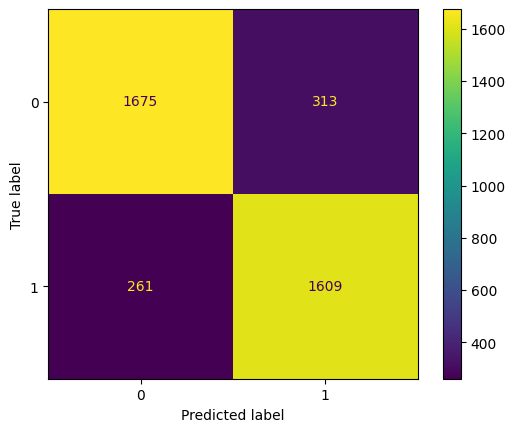

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test.values, new_predictions, labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
disp.plot()
plt.show()

# RandomForest Classifier

<ipython-input-115-f8357b7bd291>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train.values, y_train.values)


Accuracy: 0.9872991187143598
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1988
           1       0.98      1.00      0.99      1870

    accuracy                           0.99      3858
   macro avg       0.99      0.99      0.99      3858
weighted avg       0.99      0.99      0.99      3858

Confusion Matrix:
 [[1947   41]
 [   8 1862]]


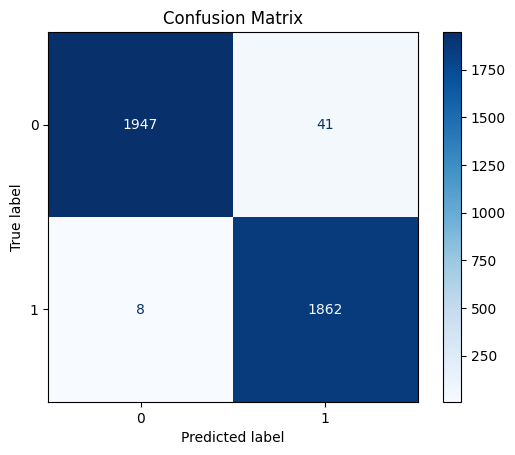

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train.values, y_train.values)

# Make predictions on the test data
y_pred = rf_model.predict(X_test.values)

# Calculate accuracy
accuracy = accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test.values, y_pred)
print("Classification Report:\n", report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test.values, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(df['Machine failure']))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


# Support Vector Machine (SVM) classifier using scikit-learn

In [117]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Create and train the SVM model:

In [120]:
# Create an SVM classifier
svm_model = SVC(kernel='linear', random_state=42)  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly')

# Train the model on the training data
svm_model.fit(X_train.values, y_train.values.ravel())


SVC(kernel='linear', random_state=42)

### Make predictions:

In [121]:
# Make predictions on the test data
y_pred = svm_model.predict(X_test.values)


### Evaluate the model:

Assess the model's performance using appropriate evaluation metrics for classification tasks.

In [122]:
# Calculate accuracy
accuracy = accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test.values, y_pred)
print("Classification Report:\n", report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test.values, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.852514256091239
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1988
           1       0.83      0.87      0.85      1870

    accuracy                           0.85      3858
   macro avg       0.85      0.85      0.85      3858
weighted avg       0.85      0.85      0.85      3858

Confusion Matrix:
 [[1664  324]
 [ 245 1625]]


### Plot Confusion matrix

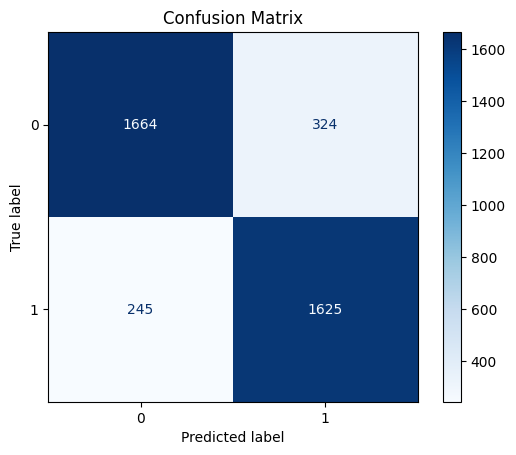

In [123]:
# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(df['Machine failure']))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

### Adjust hyperparameters (if needed):

You can tune hyperparameters such as the kernel, regularization strength (C), and gamma for better performance.

In [124]:
# Example of adjusting the regularization strength (C)
svm_model2 = SVC(kernel='linear', C=0.1, random_state=42)
svm_model2.fit(X_train.values, y_train.values.ravel())


SVC(C=0.1, kernel='linear', random_state=42)

Accuracy: 0.8530326594090202
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1988
           1       0.83      0.87      0.85      1870

    accuracy                           0.85      3858
   macro avg       0.85      0.85      0.85      3858
weighted avg       0.85      0.85      0.85      3858

Confusion Matrix:
 [[1666  322]
 [ 245 1625]]


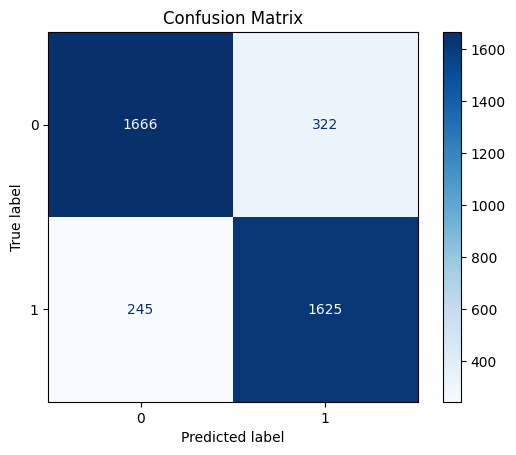

In [126]:
# Make predictions on the test data
y_pred = svm_model2.predict(X_test.values)

# Calculate accuracy
accuracy = accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test.values, y_pred)
print("Classification Report:\n", report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test.values, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(df['Machine failure']))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()